In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [3]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="Rish@123",
    database="local_business_analytics"
)

In [4]:
query = """
SELECT
    o.order_id,
    o.order_date,
    o.quantity,
    o.price,
    (o.quantity * o.price) AS total_amount,
    c.customer_id,
    c.customer_name,
    c.age,
    c.city,
    pay.payment_mode,
    pay.payment_status,
    f.rating
FROM orders o
LEFT JOIN customers c ON o.customer_id = c.customer_id
LEFT JOIN payments pay ON o.order_id = pay.order_id
LEFT JOIN feedback f ON o.order_id = f.order_id
"""

In [5]:


df = pd.read_sql(query, conn)
df.info()


df.head()
df.info()

df.isnull().sum()

df['rating'] = df['rating'].fillna(df['rating'].mean())

df['order_date'] = pd.to_datetime(df['order_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        350 non-null    int64  
 1   order_date      350 non-null    object 
 2   quantity        350 non-null    int64  
 3   price           350 non-null    int64  
 4   total_amount    350 non-null    int64  
 5   customer_id     350 non-null    int64  
 6   customer_name   350 non-null    object 
 7   age             350 non-null    int64  
 8   city            350 non-null    object 
 9   payment_mode    349 non-null    object 
 10  payment_status  349 non-null    object 
 11  rating          349 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 32.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   or

C:\Users\risha\AppData\Local\Temp\ipykernel_4284\2197608426.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Total Revenue: 62274666
order_date
2024-01    2452610
2024-02    2616995
2024-03    2329370
2024-04    3194852
2024-05    2163355
2024-06    2796664
2024-07    3345578
2024-08    2342472
2024-09    1661236
2024-10    2277047
2024-11    1728546
2024-12    2769037
2025-01    2598720
2025-02    3950311
2025-03    4047185
2025-04    2912332
2025-05    3245934
2025-06    1113032
2025-07    2367293
2025-08    2724970
2025-09    1597018
2025-10    4018095
2025-11    2649576
2025-12    1372438
Freq: M, Name: total_amount, dtype: int64


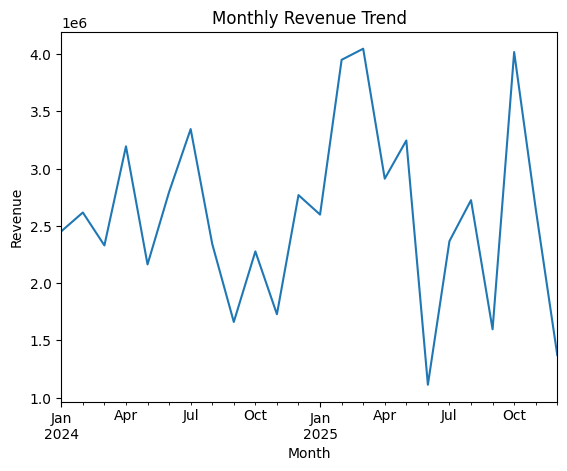

In [8]:
total_revenue = df['total_amount'].sum()
print("Total Revenue:", total_revenue)       # OUTPUT: Total Revenue: 62274666

monthly_revenue = (
    df.groupby(df['order_date'].dt.to_period('M'))['total_amount']
    .sum()
)

print(monthly_revenue)

plt.figure()
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

customer_name
Kavita Solanki      2126666
Deepika Deshmukh    1595750
Sumit Ghosh         1593709
Bina Mishra         1576499
Namita Roy          1482700
Bhavana Arora       1476594
Shruti Dutta        1428764
Sachin Desai        1406961
Ayesha Ghosh        1362850
Manoj Luthra        1320664
Name: total_amount, dtype: int64


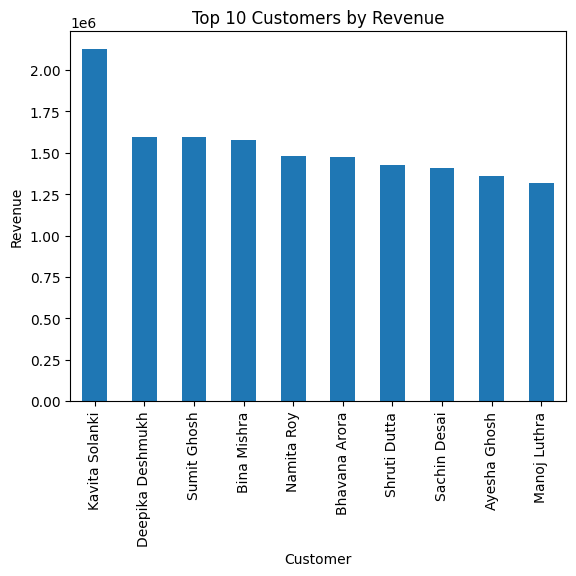

In [9]:

top_customers = (
    df.groupby('customer_name')['total_amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_customers)


plt.figure()
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer")
plt.ylabel("Revenue")
plt.show()

payment_status
Failed     180
Success    169
Unknown      1
Name: count, dtype: int64


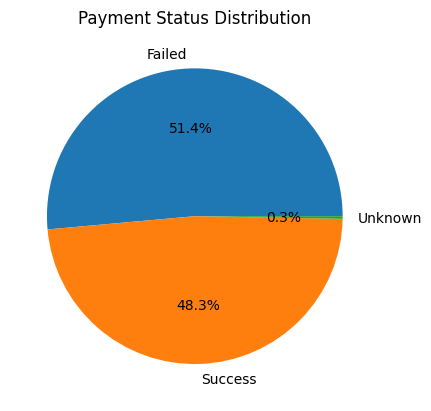

In [10]:

df['payment_status'] = df['payment_status'].fillna('Unknown')

payment_status = df['payment_status'].value_counts()
print(payment_status)


plt.figure()
payment_status.plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Status Distribution")
plt.ylabel("")
plt.show()


rating
2.000000     4186749
3.000000    11565787
4.000000     9876736
4.309456      190696
5.000000    36454698
Name: total_amount, dtype: int64


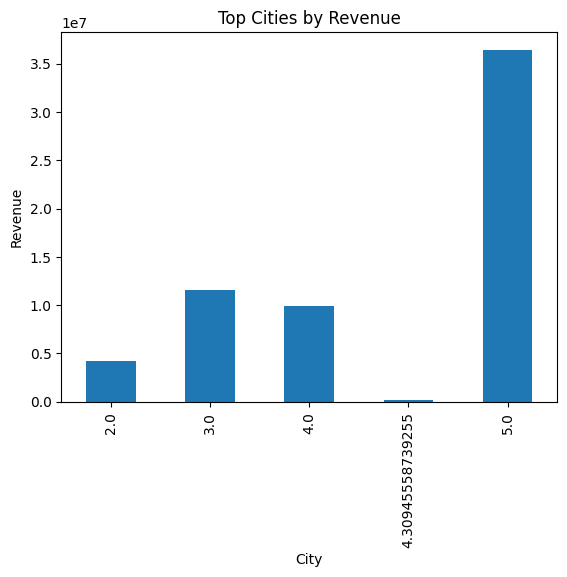

In [11]:
df['rating'] = df['rating'].fillna(0)

rating_revenue = (
    df.groupby('rating')['total_amount']
    .sum()
)

print(rating_revenue)


plt.figure()
rating_revenue.head(10).plot(kind='bar')
plt.title("Top Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()